In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from datetime import timedelta as delta
import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy import stats

from matplotlib.lines import Line2D
import matplotlib.cm  as cm
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec

In [2]:
river_sources = np.load('../river_sources.npy', allow_pickle=True).item()

In [3]:
posterior_avg = np.load('../data/analysis/sa-S03/posterior_sa-S03_average30.npy', allow_pickle=True).item()
posterior_avg_1500 = np.load('../data/analysis/sa-S03/posterior_sa-S03_average1500.npy', allow_pickle=True).item()
likelihood_avg = np.load('../data/analysis/sa-S03/likelihood_sa-S03_average30.npy', allow_pickle=True).item()
params = np.load('../data/analysis/sa-S03/params_sa-S03_average30.npy', allow_pickle=True).item()
likelihood_avg_1500 = np.load('../data/analysis/sa-S03/likelihood_sa-S03_average1500.npy', allow_pickle=True).item()
likelihood = np.load('../data/analysis/sa-S03/likelihood_sa-S03.npy', allow_pickle=True).item()
counts = np.load('../data/analysis/sa-S03/counts_sa-S03.npy', allow_pickle=True)
counts_avg = np.load('../data/analysis/sa-S03/counts_sa-S03_average30.npy', allow_pickle=True)


In [4]:
ordered_labels = ['Paraiba',
                'Rio-de-Janeiro',
                'Luanda',
                'Santos',
                'Itajai',
                'Cuvo',
                'Rio-de-la-Plata',
                'Porto-Alegre',
                'Cape-Town']

labels = list(posterior_avg.keys())

# Probability maps

In [5]:
import matplotlib.ticker as mtick

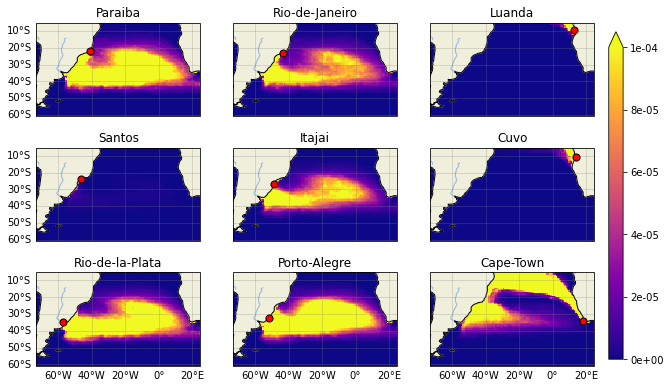

In [6]:
# likelihood 4 years
y,x = np.meshgrid(params['lat_range'], params['lon_range'])
t=0

fig,ax = plt.subplots(ncols=3,nrows=3,figsize=(10,6.5),
                      subplot_kw={'projection': ccrs.PlateCarree()}, sharey=True)

ax = ax.reshape(9)

for k, loc in enumerate(ordered_labels):
    
    z = likelihood_avg_1500[loc][t] #np.ma.masked_array(prob[loc][t], mask=prob['dimensions']['mask'])
    
    ax[k].set_extent([-73.0, 24.916666,-60.916664, -5.0833335], crs=ccrs.PlateCarree())
    #ax[k].add_feature(cfeature.OCEAN)
    ax[k].add_feature(cfeature.LAND, zorder=1)
    ax[k].add_feature(cfeature.COASTLINE)
    ax[k].add_feature(cfeature.RIVERS)
    ax[k].set_title(loc)
    im = ax[k].pcolormesh(x,y,z,cmap='plasma', vmax=0.0001)
    gl = ax[k].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5)
    
    if k in [1,2,4,5,7,8]:
        gl.left_labels = False
        
    if k in [0,1,2,3,4,5]:
        gl.bottom_labels = False
        
    gl.top_labels = False
    gl.right_labels = False
    ax[k].scatter(river_sources[loc][1], river_sources[loc][0], 
               s=50, marker='o', color='red', edgecolors='k', zorder=3)

bar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=bar_ax, orientation='vertical', extend='max')
# cbar.set_label('Likelihood', rotation=270, labelpad=15, fontsize=13)
# cbar.ax.ticklabel_format()
cbar.ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
# fig.text(0.1,0.93,f'Average particle age = {t:0.0f} months')
# fig.text(0.1,0.93,f'4.1 years average')
plt.savefig('../article_figs/likelihood_4y_average', dpi=200)

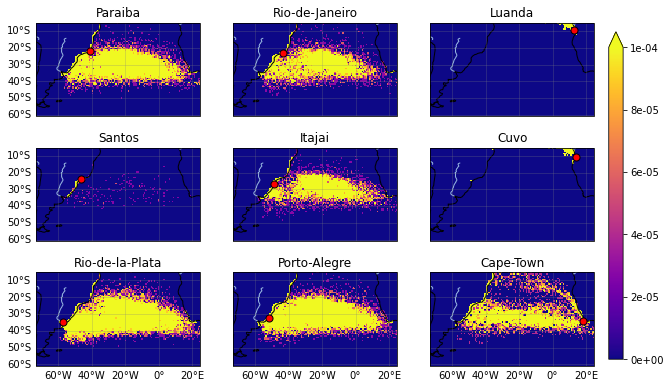

In [45]:
# likelihood 4 years
y,x = np.meshgrid(params['lat_range'], params['lon_range'])
t=1400

fig,ax = plt.subplots(ncols=3,nrows=3,figsize=(10,6.5),
                      subplot_kw={'projection': ccrs.PlateCarree()}, sharey=True)

ax = ax.reshape(9)

for k, loc in enumerate(ordered_labels):
    
    z = likelihood[loc][t] #np.ma.masked_array(prob[loc][t], mask=prob['dimensions']['mask'])
    
    ax[k].set_extent([-73.0, 24.916666,-60.916664, -5.0833335], crs=ccrs.PlateCarree())
    #ax[k].add_feature(cfeature.OCEAN)
    #ax[k].add_feature(cfeature.LAND, zorder=1)
    ax[k].add_feature(cfeature.COASTLINE)
    ax[k].add_feature(cfeature.RIVERS)
    ax[k].set_title(loc)
    im = ax[k].pcolormesh(x,y,z,cmap='plasma', vmax=0.0001)
    gl = ax[k].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5)
    
    if k in [1,2,4,5,7,8]:
        gl.left_labels = False
        
    if k in [0,1,2,3,4,5]:
        gl.bottom_labels = False
        
    gl.top_labels = False
    gl.right_labels = False
    ax[k].scatter(river_sources[loc][1], river_sources[loc][0], 
               s=50, marker='o', color='red', edgecolors='k', zorder=3)

bar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=bar_ax, orientation='vertical', extend='max')
# cbar.set_label('Likelihood', rotation=270, labelpad=15, fontsize=13)
# cbar.ax.ticklabel_format()
cbar.ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
# fig.text(0.1,0.93,f'Average particle age = {t:0.0f} months')
# fig.text(0.1,0.93,f'4.1 years average')
# plt.savefig('../article_figs/likelihood_4y_average', dpi=200)

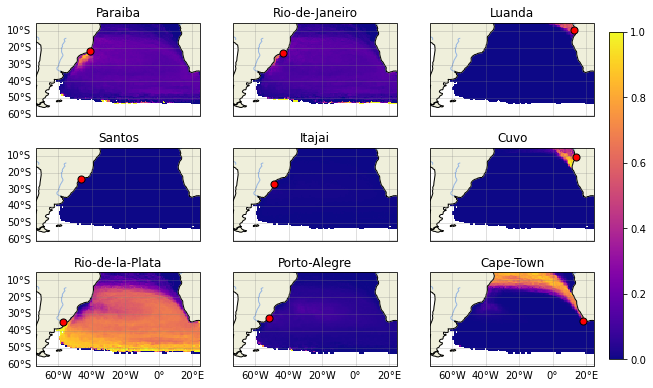

In [24]:
# posterior 4 years
y,x = np.meshgrid(params['lat_range'], params['lon_range'])
t=0

fig,ax = plt.subplots(ncols=3,nrows=3,figsize=(10,6.5),
                      subplot_kw={'projection': ccrs.PlateCarree()}, sharey=True)

ax = ax.reshape(9)

for k, loc in enumerate(ordered_labels):
    
    z = posterior_avg_1500[loc][t] #np.ma.masked_array(prob[loc][t], mask=prob['dimensions']['mask'])
    
    ax[k].set_extent([-73.0, 24.916666,-60.916664, -5.0833335], crs=ccrs.PlateCarree())
    #ax[k].add_feature(cfeature.OCEAN)
    ax[k].add_feature(cfeature.LAND, zorder=1)
    ax[k].add_feature(cfeature.COASTLINE)
    ax[k].add_feature(cfeature.RIVERS)
    ax[k].set_title(loc)
    im = ax[k].pcolormesh(x,y,z,cmap='plasma', vmax=1)
    gl = ax[k].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5)
    
    if k in [1,2,4,5,7,8]:
        gl.left_labels = False
        
    if k in [0,1,2,3,4,5]:
        gl.bottom_labels = False
        
    gl.top_labels = False
    gl.right_labels = False
    ax[k].scatter(river_sources[loc][1], river_sources[loc][0], 
               s=50, marker='o', color='red', edgecolors='k', zorder=3)

bar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=bar_ax, orientation='vertical')
# cbar.set_label('Posterior Probability', rotation=270, labelpad=15, fontsize=13)
# fig.text(0.1,0.93,f'Average particle age = {t:0.0f} months')
# fig.text(0.1,0.93,f'4.1 years average')
plt.savefig('../article_figs/posterior_4y_average', dpi=200)

/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pdi" which is no longer supported as of 3.3 and will become an error two minor releases later


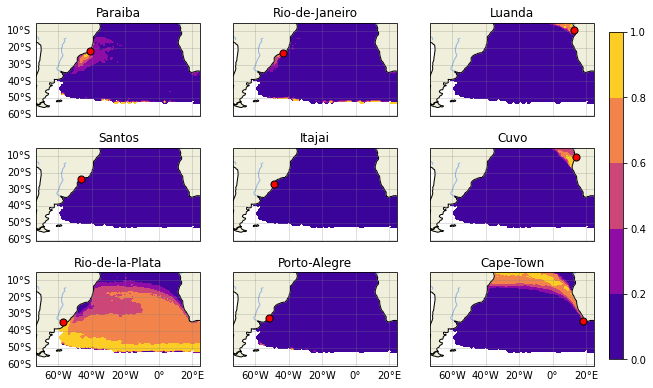

In [25]:
# posterior 4 years
y,x = np.meshgrid(params['lat_range'], params['lon_range'])
t=0

fig,ax = plt.subplots(ncols=3,nrows=3,figsize=(10,6.5),
                      subplot_kw={'projection': ccrs.PlateCarree()}, sharey=True)

ax = ax.reshape(9)

for k, loc in enumerate(ordered_labels):
    
    z = posterior_avg_1500[loc][t] #np.ma.masked_array(prob[loc][t], mask=prob['dimensions']['mask'])
    
    ax[k].set_extent([-73.0, 24.916666,-60.916664, -5.0833335], crs=ccrs.PlateCarree())
    #ax[k].add_feature(cfeature.OCEAN)
    ax[k].add_feature(cfeature.LAND, zorder=1)
    ax[k].add_feature(cfeature.COASTLINE)
    ax[k].add_feature(cfeature.RIVERS)
    ax[k].set_title(loc)
    im = ax[k].contourf(x,y,z,cmap='plasma', levels=5)
    gl = ax[k].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5)
    
    if k in [1,2,4,5,7,8]:
        gl.left_labels = False
        
    if k in [0,1,2,3,4,5]:
        gl.bottom_labels = False
        
    gl.top_labels = False
    gl.right_labels = False
    ax[k].scatter(river_sources[loc][1], river_sources[loc][0], 
               s=50, marker='o', color='red', edgecolors='k', zorder=3)

bar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=bar_ax, orientation='vertical')
# cbar.set_label('Posterior Probability', rotation=270, labelpad=15, fontsize=13)
# fig.text(0.1,0.93,f'Average particle age = {t:0.0f} months')
# fig.text(0.1,0.93,f'4.1 years average')
plt.savefig('../article_figs/posterior_4y_average_contourf', pdi=200)

# Time series
## particle age

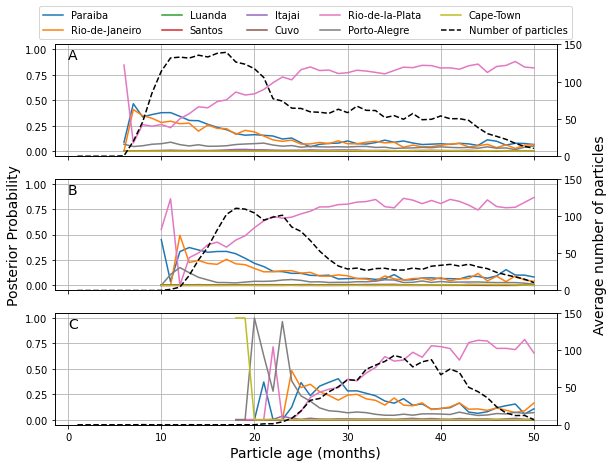

In [6]:
# x_colors = np.linspace(0,1, 9)
# colors = cm.get_cmap('tab10')(x_colors)

fig,ax = plt.subplots(ncols=1,nrows=3,figsize=(9,7),
                      sharex=True)

time = np.linspace(1,50, 50)
handles = []
for k,loc in enumerate(ordered_labels):
    
    hdl = ax[0].plot(time, posterior_avg[loc][:, 60, 50], '-',label=loc, color=f'C{k}')
    ax[1].plot(time, posterior_avg[loc][:, 90, 50], '-',label=loc, color=f'C{k}')
#     ax[2].plot(time, posterior_avg[loc][:, 70, 70], '-', label=loc, color=colors[k])
    ax[2].plot(time, posterior_avg[loc][:, 70, 70], '-', label=loc, color=f'C{k}')

    handles.append(hdl[0])
    
ax02 = ax[0].twinx()
ax12 = ax[1].twinx()
ax22 = ax[2].twinx()
hdl_twin = ax02.plot(time, counts_avg[:, 60, 50], '--',label='Number of particles', c='k')
handles = handles+hdl_twin
ax12.plot(time, counts_avg[:, 90, 50], '--',label=loc, c='k')
ax22.plot(time, counts_avg[:, 70, 70], '--',label=loc, c='k')
ax02.set_ylim(0, 150)
ax12.set_ylim(0, 150)
ax22.set_ylim(0, 150)

# ax02.set_ylabel('Number particles')
ax12.set_ylabel('Average number of particles', fontsize=14, labelpad=10)
ax[1].set_ylabel('Posterior Probability', fontsize=14)
# ax22.set_ylabel('Number particles')

for i in range(3):
    ax[i].grid()
    ax[i].set_ylim(-0.05, 1.05)

ax[0].text(0, 0.9, 'A', fontsize=14)
ax[1].text(0, 0.9, 'B', fontsize=14)
ax[2].text(0, 0.9, 'C', fontsize=14)
ax[2].set_xlabel('Particle age (months)', fontsize=14)

ax[0].legend(handles=handles, bbox_to_anchor=(0.5, 1), loc='lower center', ncol=5)
plt.savefig('../article_figs/time_series_nomap', dpi=200)

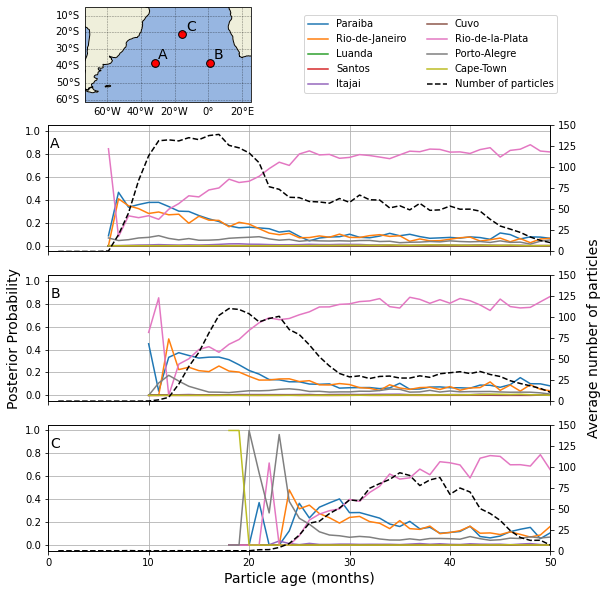

In [38]:
fig = plt.figure(figsize=(9,10))
gs = fig.add_gridspec(4, 2, wspace=0.1, height_ratios=[0.2]+[0.8/3]*3)

##
ax00 = fig.add_subplot(gs[0, 0], projection= ccrs.PlateCarree())
gl = ax00.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='black', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

ax00.set_extent([-73.0, 24.916666,-60.916664, -5.0833335], crs=ccrs.PlateCarree())

ax00.add_feature(cfeature.OCEAN)
ax00.add_feature(cfeature.LAND, zorder=1)
ax00.add_feature(cfeature.COASTLINE)

ilons = [50,90, 70]
ilats = [50,50,70]
labels= ['A', 'B','C']


for i in range(3):
    ax00.scatter(params['lon_range'][ilons[i]], params['lat_range'][ilats[i]], 
               s=60, marker='o', color='red', edgecolors='k')
    ax00.text(params['lon_range'][ilons[i]]+2, params['lat_range'][ilats[i]]+2, labels[i], fontsize=14)
    
##
ax01 = fig.add_subplot(gs[0, 1])
ax01.axis('off')

##
ax11 = fig.add_subplot(gs[1, :])
ax21 = fig.add_subplot(gs[2, :], sharex=ax11)
ax31 = fig.add_subplot(gs[3, :] , sharex=ax11)
plt.setp(ax11.get_xticklabels(), visible=False)
plt.setp(ax21.get_xticklabels(), visible=False)


handles = []
for k,loc in enumerate(ordered_labels):
    
    hdl = ax11.plot(time, posterior_avg[loc][:, 60, 50], '-',label=loc, color=f'C{k}')
    ax21.plot(time, posterior_avg[loc][:, 90, 50], '-',label=loc, color=f'C{k}')
    ax31.plot(time, posterior_avg[loc][:, 70, 70], '-', label=loc, color=f'C{k}')

    handles.append(hdl[0])
    
ax11.set_xlim(0,50)
ax21.set_xlim(0,50)
ax31.set_xlim(0,50)
    
ax11_t = ax11.twinx()
ax21_t = ax21.twinx()
ax31_t = ax31.twinx()

hdl_twin = ax11_t.plot(time, counts_avg[:, 60, 50], '--',label='Number of particles', c='k')
handles = handles + hdl_twin
ax21_t.plot(time, counts_avg[:, 90, 50], '--',label=loc, c='k')
ax31_t.plot(time, counts_avg[:, 70, 70], '--',label=loc, c='k')
ax11_t.set_ylim(0, 150)
ax21_t.set_ylim(0, 150)
ax31_t.set_ylim(0, 150)

ax21_t.set_ylabel('Average number of particles', fontsize=14, labelpad=10)
ax21.set_ylabel('Posterior Probability', fontsize=14)

ax11.grid(); ax21.grid(); ax31.grid()
ax11.set_ylim(-0.05, 1.05); ax21.set_ylim(-0.05, 1.05); ax31.set_ylim(-0.05, 1.05);

ax11.text(0.2, 0.85, 'A', fontsize=14)
ax21.text(0.2, 0.85, 'B', fontsize=14)
ax31.text(0.2, 0.85, 'C', fontsize=14)
ax31.set_xlabel('Particle age (months)', fontsize=14)

ax01.legend(handles=handles, bbox_to_anchor=(0.5, 0.5), loc='center', ncol=2)
plt.savefig('../article_figs/time_series_map', dpi=200)

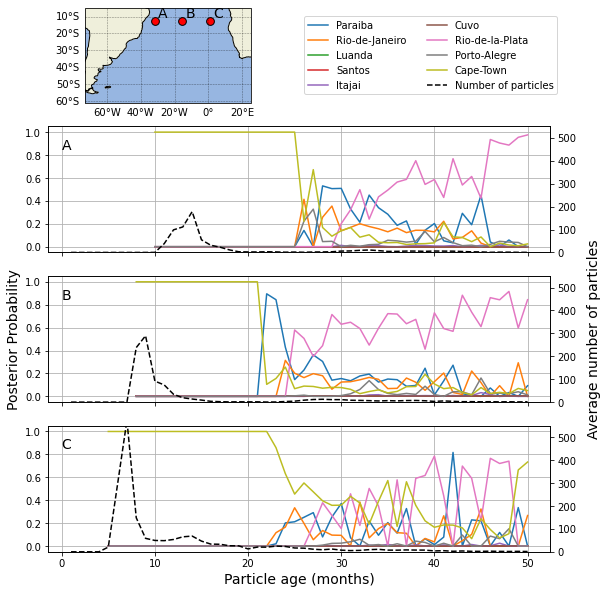

In [15]:
B = (70,80)
A = (50,80)
C = (90,80)

fig = plt.figure(figsize=(9,10))
gs = fig.add_gridspec(4, 2, wspace=0.1, height_ratios=[0.2]+[0.8/3]*3)

##
ax00 = fig.add_subplot(gs[0, 0], projection= ccrs.PlateCarree())
gl = ax00.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='black', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

ax00.set_extent([-73.0, 24.916666,-60.916664, -5.0833335], crs=ccrs.PlateCarree())

ax00.add_feature(cfeature.OCEAN)
ax00.add_feature(cfeature.LAND, zorder=1)
ax00.add_feature(cfeature.COASTLINE)

ilons = [A[0], B[0], C[0]]
ilats = [A[1], B[1], C[1]]
labels= ['A', 'B','C']


for i in range(3):
    ax00.scatter(params['lon_range'][ilons[i]], params['lat_range'][ilats[i]], 
               s=60, marker='o', color='red', edgecolors='k')
    ax00.text(params['lon_range'][ilons[i]]+2, params['lat_range'][ilats[i]]+2, labels[i], fontsize=14)
    
##
ax01 = fig.add_subplot(gs[0, 1])
ax01.axis('off')

##
ax11 = fig.add_subplot(gs[1, :])
ax21 = fig.add_subplot(gs[2, :], sharex=ax11)
ax31 = fig.add_subplot(gs[3, :] , sharex=ax11)
plt.setp(ax11.get_xticklabels(), visible=False)
plt.setp(ax21.get_xticklabels(), visible=False)


handles = []
for k,loc in enumerate(ordered_labels):
    
    hdl = ax11.plot(time, posterior_avg[loc][:, A[0], A[1]], '-',label=loc, color=f'C{k}')
    ax21.plot(time, posterior_avg[loc][:,  B[0], B[1]], '-',label=loc, color=f'C{k}')
    ax31.plot(time, posterior_avg[loc][:,  C[0], C[1]], '-', label=loc, color=f'C{k}')

    handles.append(hdl[0])
    
ax11_t = ax11.twinx()
ax21_t = ax21.twinx()
ax31_t = ax31.twinx()

hdl_twin = ax11_t.plot(time, counts_avg[:, A[0], A[1]], '--',label='Number of particles', c='k')
handles = handles + hdl_twin
ax21_t.plot(time, counts_avg[:,  B[0], B[1]], '--',label=loc, c='k')
ax31_t.plot(time, counts_avg[:,  C[0], C[1]], '--',label=loc, c='k')
up_lim = 550
ax11_t.set_ylim(0, up_lim)
ax21_t.set_ylim(0, up_lim)
ax31_t.set_ylim(0, up_lim)

ax21_t.set_ylabel('Average number of particles', fontsize=14, labelpad=10)
ax21.set_ylabel('Posterior Probability', fontsize=14)

ax11.grid(); ax21.grid(); ax31.grid()
ax11.set_ylim(-0.05, 1.05); ax21.set_ylim(-0.05, 1.05); ax31.set_ylim(-0.05, 1.05);

ax11.text(0, 0.85, 'A', fontsize=14)
ax21.text(0, 0.85, 'B', fontsize=14)
ax31.text(0, 0.85, 'C', fontsize=14)
ax31.set_xlabel('Particle age (months)', fontsize=14)

ax01.legend(handles=handles, bbox_to_anchor=(0.5, 0.5), loc='center', ncol=2)
# plt.savefig('../article_figs/time_series_map_north', dpi=200)

# Beaching probability

Detect new coastal cells after computing the histogram?

In [27]:
post_beach = np.load('../data/analysis/sa-S03/beached_posterior_sa-S03_average1500.npy', allow_pickle=True).item()
params_beach = np.load('../data/analysis/sa-S03/beached_params_sa-S03_average1500.npy', allow_pickle=True).item()
# counts = np.load('../data/analysis/counts.npy', allow_pickle=True).item()

In [28]:
river_sources.keys()

dict_keys(['Luanda', 'Cuvo', 'Paraiba', 'Itajai', 'Chiloango-Congo', 'Cape-Town', 'Rio-de-la-Plata', 'Rio-de-Janeiro', 'Porto-Alegre', 'Santos'])

In [29]:
african_sources = ['Luanda', 'Cuvo', 'Chiloango-Congo', 'Cape-Town']
american_sources = ['Paraiba', 'Itajai', 'Rio-de-la-Plata', 'Rio-de-Janeiro', 'Porto-Alegre', 'Santos']

/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator


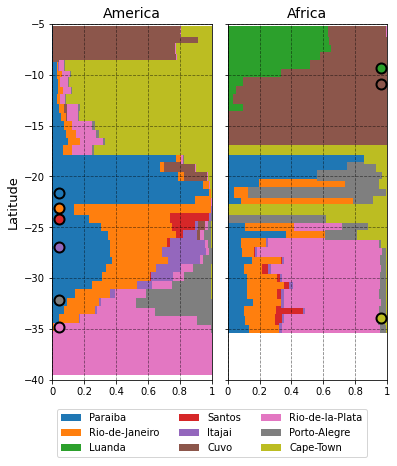

In [35]:
# x_colors = np.linspace(0,1, 9)
# colors = cm.get_cmap('tab10')(x_colors)

fig = plt.figure(figsize=(6,8))
gs = fig.add_gridspec(2, 2, wspace=0.1, height_ratios=[0.9, 0.1])
ax = gs.subplots(sharey=True)
lower_margin_am = 0
lower_margin_af = 0

for k, loc in enumerate(ordered_labels):
    ax[0,0].barh(params_beach['lat_range_america'], post_beach['America'][loc][0], label=loc, height=1,
           left=lower_margin_am, color=f'C{k}')
    lower_margin_am += np.nan_to_num(post_beach['America'][loc][0])
    
    ax[0,1].barh(params_beach['lat_range_america'], post_beach['Africa'][loc][0], height=1,
           left=lower_margin_af, color=f'C{k}')
    lower_margin_af += np.nan_to_num(post_beach['Africa'][loc][0])
    
    if loc in african_sources:
        ax[0,1].scatter(0.96, river_sources[loc][0], color=f'C{k}', edgecolor='k', zorder=3, s=100,
                     linewidths=2)
    elif loc in american_sources:
        ax[0,0].scatter(0.04, river_sources[loc][0], color=f'C{k}', edgecolor='k', zorder=3, s=100,
                     linewidths=2)
        
my_ticks = [0, 0.2, 0.4, 0.6, 0.8, 1]
ax[0,0].set_xticklabels(my_ticks)
ax[0,1].set_xticklabels(my_ticks)
ax[0,0].set_ylim(-40, -5)
ax[0,0].set_xlim(0, 1)
ax[0,0].legend(bbox_to_anchor=(1, -0.15), loc='center', ncol=3)
ax[0,0].set_title('America', fontsize=14)

ax[0,1].set_title('Africa', fontsize=14)
ax[0,0].set_ylabel('Latitude', fontsize=13)
# ax[0,0].set_xlabel('Probability', fontsize=13)
# ax[0,1].set_xlabel('Probability', fontsize=13)
ax[0,0].grid(color='k', linestyle='--', alpha=0.5)
ax[0,1].grid(color='k', linestyle='--', alpha=0.5)

ax[1,0].axis('off')
ax[1,1].axis('off')
plt.savefig('../article_figs/beached_posterior_4y_average', dpi=200)